In [43]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import time
import joblib

# Classifier Libraries

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [44]:
df_original = pd.read_csv('C:/workdir/creditcard.csv')
scaler = RobustScaler()

df_original['amount_scaled'] = scaler.fit_transform(df_original['Amount'].values.reshape(-1,1))
df_original['time_scaled'] = scaler.fit_transform(df_original['Time'].values.reshape(-1,1))

df_original.drop(['Time','Amount'], axis=1, inplace=True)
df_original.head()
X_og = df_original.drop('Class',axis=1)
y_og = df_original['Class']

In [45]:
df = pd.read_csv('sample.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-0.529823,1.407262,1.738746,4.146023,1.480417,2.866347,0.359050,0.238154,-1.497558,1.438364,...,0.468685,-0.381216,3.580256,0.567289,0.489720,-0.326392,-0.098026,0,-0.056732,0.795686
1,-1.564287,1.932475,1.175623,0.455995,0.232474,-0.656435,1.250255,-1.150169,1.018456,2.258055,...,0.463195,-0.197013,0.360786,-0.402266,-0.554761,-1.640322,-0.405129,0,-0.296514,-0.490842
2,-0.307412,0.738235,0.704487,0.769682,0.900297,0.701397,0.460596,0.166202,1.644412,-0.665600,...,-0.654305,-0.177319,-1.173849,-0.436494,-0.832108,0.081904,0.162489,0,-0.181653,0.178468
3,-1.766694,-1.303744,0.362310,-0.650985,1.291725,1.858002,0.085196,0.549395,0.769865,-0.600371,...,1.465412,0.862277,-0.931001,-0.627362,-0.227827,0.275914,0.178937,0,1.620904,0.770615
4,-1.467214,2.166707,-2.302486,0.876719,0.823426,0.024706,0.248859,1.255101,-1.122335,-0.881772,...,0.195308,-0.225279,-0.351585,0.140542,-0.386846,-0.183945,0.030117,0,0.067351,0.781729


In [46]:
"""scaler = RobustScaler()

df['amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()"""

"scaler = RobustScaler()\n\ndf['amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))\ndf['time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))\n\ndf.drop(['Time','Amount'], axis=1, inplace=True)\ndf.head()"

In [47]:

from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))
print(Counter(y_train))
print(Counter(y_test))

Length of X (train): 45884 | Length of y (train): 45884
Length of X (test): 11471 | Length of y (test): 11471
Counter({0: 45494, 1: 390})
Counter({0: 11369, 1: 102})


Counter({0: 45494, 1: 45494})
Counter({0: 11369, 1: 11369})


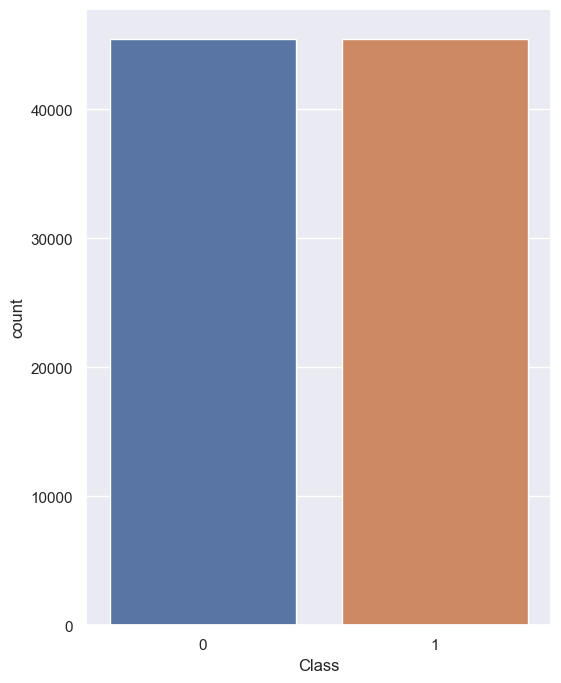

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)

Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)
Xsm_test, ysm_test = sm.fit_resample(X_test,y_test)
print(Counter(ysm_train))
print(Counter(ysm_test))
sns.countplot(x=ysm_train)
plt.show()

Ezzel meg is kaptuk a SMOTE által oversampled tanító adathalmazunkat. Láthatjuk, hogy a célváltozó mindkét értékéből egyenlő számú adatsort sikerült létrehoznunk, ezáltal ismét egy tökéletesen kiegyensúlyozott tanító adatbázist kaptunk.

Nézzük meg, hogy az előző példához képest, hogyan változtak a változók közötti korrelációk?

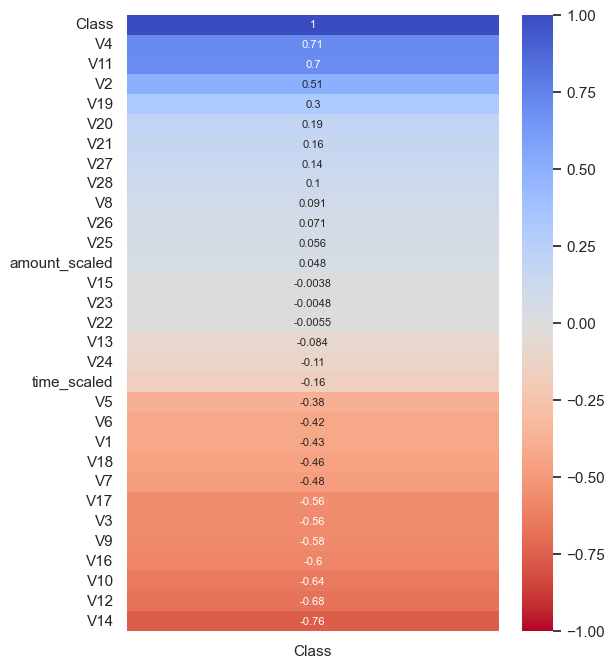

In [49]:
sm_train_df = pd.concat([Xsm_train, ysm_train], axis=1, join='inner')
sns.set(font_scale=0.6)
sns.set (rc = {'figure.figsize':(6, 8)})
sns.heatmap(sm_train_df.corr()[['Class']].sort_values(by='Class', ascending=False),vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, cmap='coolwarm_r')
plt.show()

A korreláció nagyon hasonló, a top 3 és alsó 4 változatlan, kicsit eltérő számokkal, de nem jelentősen.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

logreg_sm = LogisticRegression(n_jobs=-1)
dectree_sm = DecisionTreeClassifier()
svc_sm = LinearSVC()
knear_sm = KNeighborsClassifier(n_jobs=-1)


In [51]:

logreg_sm.fit(Xsm_train, ysm_train)
dectree_sm.fit(Xsm_train,ysm_train)
svc_sm.fit(Xsm_train,ysm_train)
knear_sm.fit(Xsm_train,ysm_train)

KNeighborsClassifier(n_jobs=-1)

In [52]:
logreg_pred = logreg_sm.predict(Xsm_test)
svc_pred = svc_sm.predict(Xsm_test)
dectree_pred = dectree_sm.predict(Xsm_test)
knear_pred = knear_sm.predict(Xsm_test)
print("A logisztikus regresszió modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, logreg_pred))
print("A Support Vector Machine modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, svc_pred))
print("A Döntési fa modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, dectree_pred))
print("A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, knear_pred))

A logisztikus regresszió modellünk pontossági pontszáma jelenleg:  0.9458175741050224
A Support Vector Machine modellünk pontossági pontszáma jelenleg:  0.9486762248218841
A Döntési fa modellünk pontossági pontszáma jelenleg:  0.9234761192717038
A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg:  0.9531181282434691


Így első ránézésre úgy néz ki, hogy a logisztikus regressziót és a Support Vector machinet nem érintette komolyabban a SMOTE adathalmaz, sőt az SVM még jobb is lett 2 % ponttal, mint a Random Undersampling során. Azonban a döntési fa és a K közelebbi szomszéd már rosszabbul kezelték a hirtelen megnövekedett adathalmazt, pontatlanabbak lettek. Nézzük meg, hogy a hiperparaméter tuning után milyen eredményeket kapunk.

In [53]:

from sklearn.model_selection import RandomizedSearchCV


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = RandomizedSearchCV(LogisticRegression(n_jobs=-1), log_reg_params)
grid_log_reg.fit(Xsm_train, ysm_train)
print(grid_log_reg.best_params_)
logreg_sm = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = RandomizedSearchCV(KNeighborsClassifier(n_jobs=-1), knears_params)
grid_knears.fit(Xsm_train, ysm_train)
print(grid_knears.best_params_)
knear_sm = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {"penalty": ['l1', 'l2'], 'C': [0.5, 0.7, 0.9, 1]}
grid_svc = RandomizedSearchCV(LinearSVC(), svc_params)
grid_svc.fit(Xsm_train, ysm_train)
print(grid_svc.best_params_)

# SVC best estimator
svc_sm = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(Xsm_train, ysm_train)
print(grid_tree.best_params_)

# tree best estimator
dectree_sm = grid_tree.best_estimator_

{'penalty': 'l2', 'C': 100}
{'n_neighbors': 2, 'algorithm': 'auto'}
{'penalty': 'l2', 'C': 1}
{'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'gini'}


In [54]:
logreg_pred = logreg_sm.predict(Xsm_test)
svc_pred = svc_sm.predict(Xsm_test)
dectree_pred = dectree_sm.predict(Xsm_test)
knear_pred = knear_sm.predict(Xsm_test)
print("A logisztikus regresszió modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, logreg_pred))
print("A Support Vector Machine modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, svc_pred))
print("A Döntési fa modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, dectree_pred))
print("A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, knear_pred))

A logisztikus regresszió modellünk pontossági pontszáma jelenleg:  0.9458615533468203
A Support Vector Machine modellünk pontossági pontszáma jelenleg:  0.94937989269065
A Döntési fa modellünk pontossági pontszáma jelenleg:  0.9241358078986718
A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg:  0.9421233177940013


Classification report:

In [55]:
print("Logreg: ")
print(classification_report(ysm_test,logreg_pred))
print("SVC: ")
print(classification_report(ysm_test,svc_pred))
print("Knear: ")
print(classification_report(ysm_test,knear_pred))
print("dectree: ")
print(classification_report(ysm_test,dectree_pred))

Logreg: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11369
           1       0.97      0.92      0.94     11369

    accuracy                           0.95     22738
   macro avg       0.95      0.95      0.95     22738
weighted avg       0.95      0.95      0.95     22738

SVC: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11369
           1       0.97      0.92      0.95     11369

    accuracy                           0.95     22738
   macro avg       0.95      0.95      0.95     22738
weighted avg       0.95      0.95      0.95     22738

Knear: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     11369
           1       1.00      0.89      0.94     11369

    accuracy                           0.94     22738
   macro avg       0.95      0.94      0.94     22738
weighted avg       0.95      0.94      0.94     227

Roc-AUC score:

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logreg_pred = logreg_sm.decision_function(Xsm_test)
svc_pred = svc_sm.decision_function(Xsm_test)
dectree_pred = dectree_sm.predict_proba(Xsm_test)
knear_pred = knear_sm.predict_proba(Xsm_test)


print('Logistic Regression: ', roc_auc_score(ysm_test, logreg_pred))
print('Support Vector Classifier: ', roc_auc_score(ysm_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(ysm_test, dectree_pred[:,1]))
print('KNears Neighbors: ', roc_auc_score(ysm_test, knear_pred[:,1]))

Logistic Regression:  0.9867047529711634
Support Vector Classifier:  0.9878350299299069
Decision Tree Classifier:  0.9813976240192376
KNears Neighbors:  0.9514569399433108


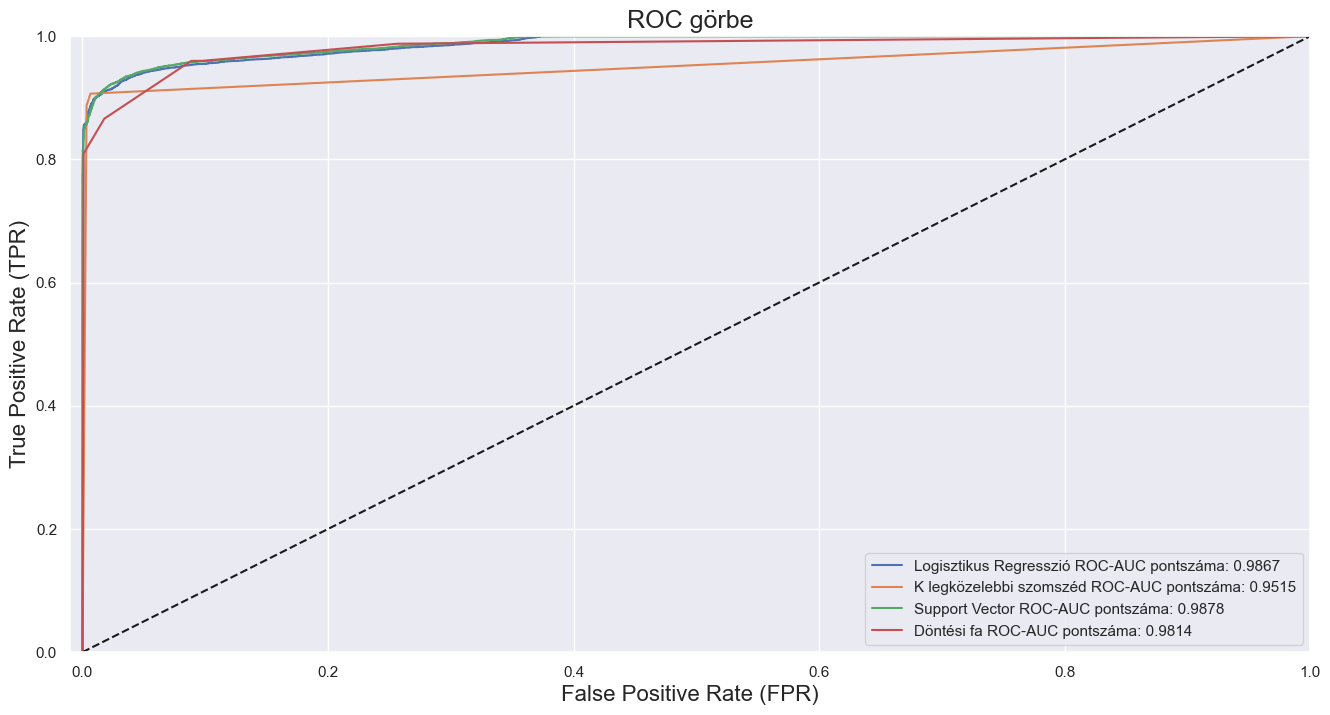

In [57]:
log_fpr, log_tpr, log_thresold = roc_curve(ysm_test, logreg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(ysm_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(ysm_test, dectree_pred[:,1])
knear_fpr, knear_tpr, knear_threshold = roc_curve(ysm_test, knear_pred[:,1])

def graph_roc_curve_multiple(log_fpr, log_tpr,knear_fpr, knear_tpr, svc_fpr, svc_tpr,tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC görbe', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logisztikus Regresszió ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(ysm_test, logreg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='K legközelebbi szomszéd ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(ysm_test, knear_pred[:,1])))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(ysm_test, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Döntési fa ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(ysm_test, dectree_pred[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
   
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

confusion matrix: kiegyenlített SMOTE

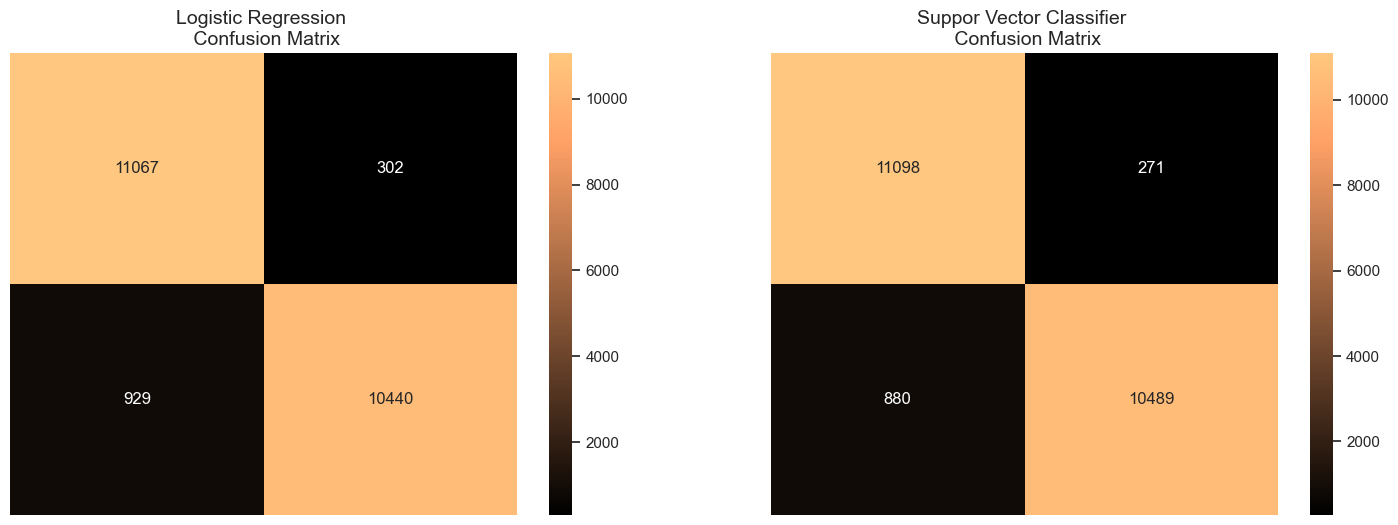

In [58]:
from sklearn.metrics import confusion_matrix

y_pred_logreg = logreg_sm.predict(Xsm_test)
y_pred_svc = svc_sm.predict(Xsm_test)


log_reg_cf = confusion_matrix(ysm_test, y_pred_logreg)
svc_cf = confusion_matrix(ysm_test, y_pred_svc)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6))

sns.heatmap(log_reg_cf, ax=ax1, annot=True,fmt='g', cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax2, annot=True,fmt='g', cmap=plt.cm.copper)
ax2.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

végső teszt:

[[276937   7378]
 [    39    453]]
[[277244   7071]
 [    42    450]]


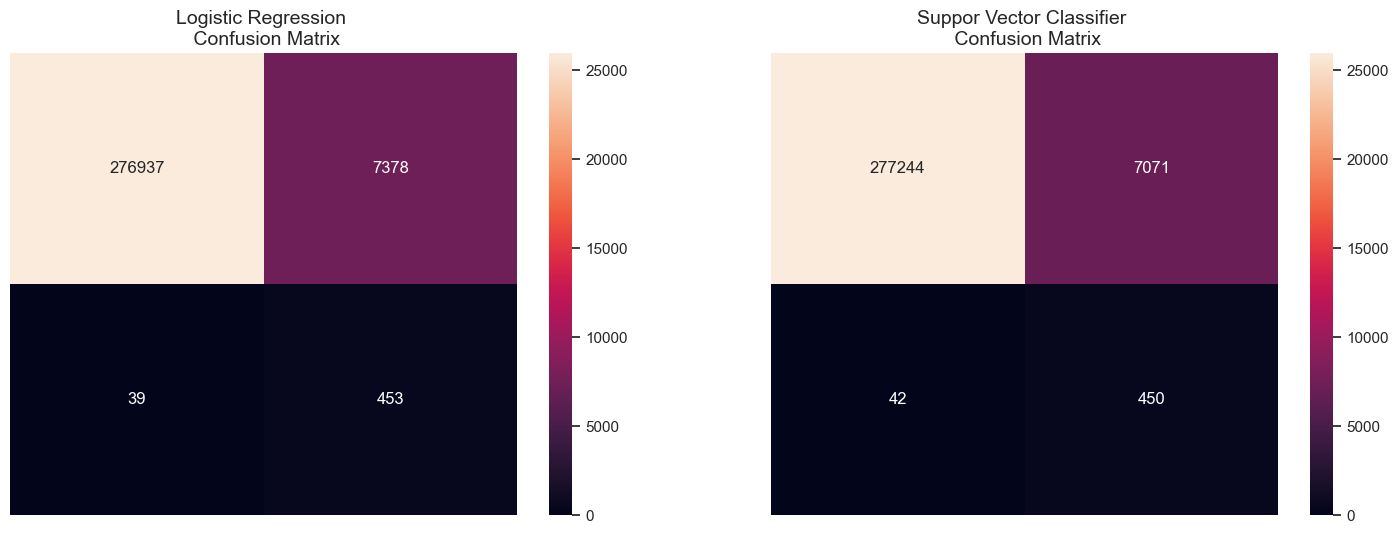

In [59]:
from sklearn.metrics import confusion_matrix

y_pred_logreg_original = logreg_sm.predict(X_og)
y_pred_svc_original = svc_sm.predict(X_og)


log_reg_cf = confusion_matrix(y_og, y_pred_logreg_original)
svc_cf = confusion_matrix(y_og, y_pred_svc_original)

print(log_reg_cf)
print(svc_cf)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6))

sns.heatmap(log_reg_cf, ax=ax1,vmin=0, vmax=26000, annot=True, fmt='g')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=8, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=8, rotation=360)

sns.heatmap(svc_cf, ax=ax2,vmin=0,vmax=26000, annot=True, fmt='g')
ax2.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=8, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=8, rotation=360)

plt.show()

In [62]:
print(classification_report(y_og,y_pred_logreg_original))
print(classification_report(y_og,y_pred_svc_original))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.06      0.92      0.11       492

    accuracy                           0.97    284807
   macro avg       0.53      0.95      0.55    284807
weighted avg       1.00      0.97      0.99    284807

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.91      0.11       492

    accuracy                           0.98    284807
   macro avg       0.53      0.94      0.55    284807
weighted avg       1.00      0.98      0.99    284807



In [ ]:
y_pred_dectree_original = dectree_sm.predict(X_og)
y_pred_knear_original = knear_sm.predict(X_og)
print(classification_report(y_og,y_pred_dectree_original))
print(classification_report(y_og,y_pred_knear_original))
print(roc_auc_score(y_og,y_pred_dectree_original))
print(roc_auc_score(y_og,y_pred_knear_original))
print(roc_auc_score(y_og,y_pred_logreg_original))
print(roc_auc_score(y_og,y_pred_svc_original))